In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement 
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).all()[0]

('2017-08-23',)

<Axes: xlabel='date'>

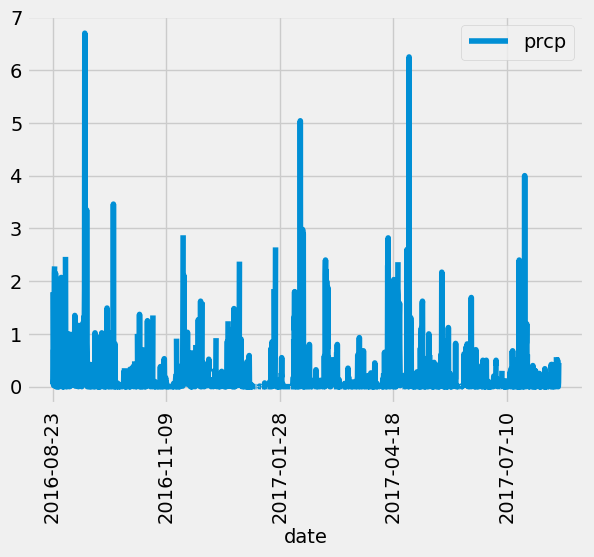

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)
one_year_ago
# Perform a query to retrieve the date and precipitation scores
prcp_results=session.query(measurement.date, measurement.prcp).\
filter(measurement.date>=one_year_ago).all()
prcp_results
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.DataFrame(prcp_results, columns=["date","prcp"])

# Sort the dataframe by date
prcp_df=prcp_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x="date",y="prcp", rot=90)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(
    measurement.station, func.count(measurement.station)
).group_by( measurement.station).order_by(
    func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station==('USC00519281')).all()

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [17]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station=session.query(measurement.station, measurement.tobs)\
.filter(measurement.date >'2016-8-23' )\
.filter(measurement.date<= '2017-08-23')\
.filter(measurement.station=='USC00519281').all()
active_station



[('USC00519281', 72.0),
 ('USC00519281', 70.0),
 ('USC00519281', 64.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 62.0),
 ('USC00519281', 70.0),
 ('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 63.0),
 ('USC00519281', 65.0),
 ('USC00519281', 69.0),
 ('USC00519281', 77.0),
 ('USC00519281', 70.0),
 ('USC00519281', 74.0),
 ('USC00519281', 69.0),
 ('USC00519281', 72.0),
 ('USC00519281', 71.0),
 ('USC00519281', 69.0),
 ('USC00519281', 71.0),
 ('USC00519281', 71.0),
 ('USC00519281', 72.0),
 ('USC00519281', 72.0),
 ('USC00519281', 69.0),
 ('USC00519281', 70.0),
 ('USC00519281', 66.0),
 ('USC00519281', 65.0),
 ('USC00519281', 69.0),
 ('USC00519281', 68.0),
 ('USC00519281', 68.0),
 ('USC00519281', 68.0),
 ('USC00519281', 59.0),
 ('USC00519281', 60.0),
 ('USC00519281', 70.0),
 ('USC00519281', 73.0),
 ('USC00519281', 75.0),
 ('USC00519281', 64.0),
 ('USC00519281', 59.0),
 ('USC00519281', 59.0),
 ('USC00519281', 62.0),
 ('USC00519281',

In [18]:
active_station_df=pd.DataFrame(active_station, columns=["station","tobs"])
active_station_df

,station,tobs
0,USC00519281,72.0
1,USC00519281,70.0
2,USC00519281,64.0
3,USC00519281,63.0
4,USC00519281,63.0
...,...,...
216,USC00519281,77.0
217,USC00519281,77.0
218,USC00519281,76.0
219,USC00519281,76.0


# Close Session

Text(0, 0.5, 'Frequencies')

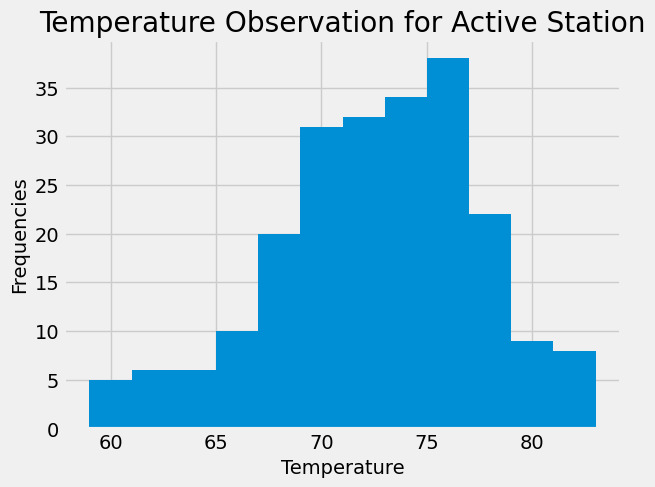

In [27]:
plot=active_station_df.hist(bins=12)
plt.title('Temperature Observation for Active Station')
plt.xlabel('Temperature')
plt.ylabel('Frequencies')

In [20]:
# Close Session
session.close()